In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [4]:
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [6]:
roses = list(data_dir.glob('roses/*'))

In [7]:
roses

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

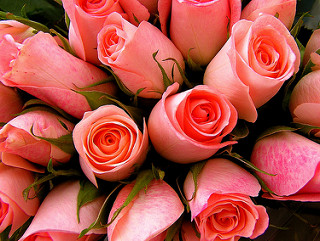

In [8]:
PIL.Image.open(str(roses[8]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
a = cv2.imread(str(flowers_images_dict['roses'][0]))
a

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [12]:
a.shape , cv2.resize(a , (180,180)).shape

((240, 179, 3), (180, 180, 3))

In [13]:
X = []
y = []

In [14]:
for flower_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        reshaped = cv2.resize(img , (180,180))
        X.append(reshaped)
        y.append(flowers_labels_dict[flower_name])

(<matplotlib.image.AxesImage at 0x1897fe6efd0>, 0)

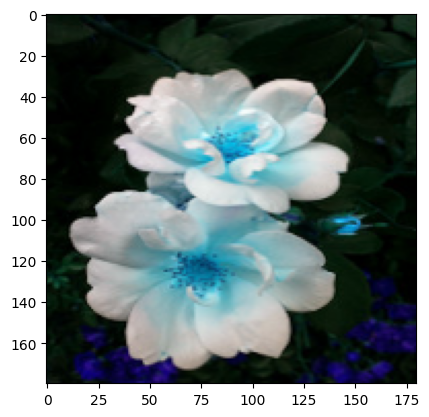

In [15]:
plt.imshow(X[0]) , y[0]

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
X = X/255

In [18]:
X[0].shape

(180, 180, 3)

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test ,  y_train , y_test = train_test_split(X , y  , test_size =0.33)

In [20]:
X_train.shape

(2458, 180, 180, 3)

In [21]:
import gc

In [22]:
gc.collect()

63

In [77]:
model = keras.Sequential([
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu"  ),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu" ),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu" ),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(30 , activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10) #  activation= linear
    ])

model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"]  )

In [82]:
model.fit(X_train , y_train , epochs=20 , batch_size=10)
gc.collect()

Epoch 1/20
246/246 [==============================] - 11s 36ms/step - loss: 2.9982 - accuracy: 0.1766
Epoch 2/20
246/246 [==============================] - 8s 34ms/step - loss: 3.0782 - accuracy: 0.1937
Epoch 3/20
246/246 [==============================] - 8s 33ms/step - loss: 3.7163 - accuracy: 0.1823
Epoch 4/20
246/246 [==============================] - 8s 34ms/step - loss: 3.8601 - accuracy: 0.1932
Epoch 5/20
246/246 [==============================] - 8s 34ms/step - loss: 3.6571 - accuracy: 0.1753
Epoch 6/20
246/246 [==============================] - 9s 35ms/step - loss: 3.0675 - accuracy: 0.1843
Epoch 7/20
246/246 [==============================] - 9s 35ms/step - loss: 2.1243 - accuracy: 0.1835
Epoch 8/20
246/246 [==============================] - 9s 36ms/step - loss: 2.0777 - accuracy: 0.1713
Epoch 9/20
246/246 [==============================] - 9s 36ms/step - loss: 2.0515 - accuracy: 0.1896
Epoch 10/20
246/246 [==============================] - 9s 38ms/step - loss: 2.1521 - accur

736

In [24]:
X.size * X.itemsize / 10**9

2.853792

In [39]:
arg = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip( "horizontal"),
    keras.layers.experimental.preprocessing.RandomRotation(0.9),
    keras.layers.experimental.preprocessing.Rescaling(0.5),

])

In [40]:
model2 = keras.Sequential([
    arg,
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu"  ),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(20 , (3,3) , padding="same" , activation="relu" ),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(120 , activation="relu"),
    keras.layers.Dense(5) #  activation= linear
    ])

model2.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"]  )

In [43]:
model2.fit(X_train , y_train , epochs=30)
gc.collect()

Epoch 1/30


NotImplementedError: in user code:

    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:291 call
        outputs = layer(inputs, **kwargs)
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:291 call
        outputs = layer(inputs, **kwargs)
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:813 call
        output = tf_utils.smart_cond(training, random_rotated_inputs,
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\utils\tf_utils.py:64 smart_cond
        return smart_module.smart_cond(
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\framework\smart_cond.py:54 smart_cond
        return true_fn()
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:809 random_rotated_inputs
        get_rotation_matrix(angles, img_hd, img_wd),
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:712 get_rotation_matrix
        array_ops.zeros((num_angles, 2), dtypes.float32),
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\ops\array_ops.py:2677 wrapped
        tensor = fun(*args, **kwargs)
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\ops\array_ops.py:2721 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\ops\array_ops.py:2662 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:180 prod
        
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3045 prod
        Examples
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86 _wrapreduction
        
    c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\framework\ops.py:748 __array__
        raise NotImplementedError("Cannot convert a symbolic Tensor ({}) to a numpy"

    NotImplementedError: Cannot convert a symbolic Tensor (sequential_10/sequential_9/random_rotation_8/rotation_matrix/strided_slice:0) to a numpy array.
